## Importing Data

In [ ]:
import pandas as pd
import os
import sys
import re
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
afcars_folder_path = r'/content/drive/MyDrive/TAG'
filenames = os.listdir(afcars_folder_path)
get_only_tab_files = []
  
for file in filenames:
    # search given pattern in the line 
    match = re.search("\.tab$", file)
  
    # if match is found
    if match:
        get_only_tab_files.append(file)

get_only_tab_files


['FC2014v7.tab',
 'FC2010v6.tab',
 'FC2016v6.tab',
 'FC2011v6.tab',
 'FC2012v7.tab',
 'FC2018v3.tab',
 'FC2017v5.tab',
 'FC2019v2.tab',
 'FC2013v7.tab',
 'FC2015v8.tab',
 'FC2020v1.tab',
 'FC2021v1.tab']

In [ ]:
data_2021 = pd.read_csv('/content/drive/MyDrive/TAG/FC2021v1.tab', sep ='\t')


<ipython-input-91-bf918f419f02>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2021 = pd.read_csv('/content/drive/MyDrive/TAG/FC2021v1.tab', sep ='\t')


In [ ]:
# data_2019 = pd.read_csv('/content/drive/MyDrive/TAG/FC2019v2.tab', sep ='\t')


In [ ]:
data_2021.shape

(606187, 107)

In [ ]:
#67
# data_2019.shape

In [ ]:
population_list = pd.read_csv('/content/drive/MyDrive/TAG/Child_Population_2021.csv')

In [ ]:
population_list.head()

,State,Year,Total Children Under 18
0,Alabama,2021,1122252
1,Alaska,2021,179356
2,Arizona,2021,1613988
3,Arkansas,2021,703389
4,California,2021,8772631


In [ ]:
population_list = population_list[['State','Total Children Under 18']]

In [ ]:
population_list.head()

,State,Total Children Under 18
0,Alabama,1122252
1,Alaska,179356
2,Arizona,1613988
3,Arkansas,703389
4,California,8772631


In [ ]:
state_dict = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'District of Columbia': 'DC',
    'Puerto Rico' :'PR'
}
state_dict_2 = {j:i for i,j in state_dict.items()}

In [ ]:
data_2021['state_name'] = data_2021['St'].map(state_dict_2)

In [ ]:
#Removing Null values of LatRemDt  - Date of Latest Removal from Home
data_2021 = data_2021.dropna(subset=['LatRemDt'])

In [ ]:
data_2021.head()

,FY,Version,STATE,St,REPDATYR,REPDATMO,FIPSCode,RecNumbr,SEX,AMIAKN,ASIAN,BLKAFRAM,HAWAIIPI,WHITE,UNTODETM,HISORGIN,CLINDIS,MR,VISHEAR,PHYDIS,EmotDist,OTHERMED,EVERADPT,AGEADOPT,TOTALREM,NUMPLEP,MANREM,PHYABUSE,SEXABUSE,NEGLECT,AAPARENT,DAPARENT,AACHILD,DACHILD,CHILDIS,CHBEHPRB,PRTSDIED,PRTSJAIL,NOCOPE,ABANDMNT,RELINQSH,HOUSING,CURPLSET,PLACEOUT,CASEGOAL,CTKFAMST,CTK1YR,CTK2YR,FOSFAMST,FCCTK1YR,FCCTK2YR,RF1AMAKN,RF1ASIAN,RF1BLKAA,RF1NHOPI,RF1WHITE,RF1UTOD,HOFCCTK1,RF2AMAKN,RF2ASIAN,RF2BLKAA,RF2NHOPI,RF2WHITE,RF2UTOD,HOFCCTK2,DISREASN,IVEFC,IVEAA,IVAAFDC,IVDCHSUP,XIXMEDCD,SSIOTHER,NOA,FCMntPay,DOB,PedRevDt,Rem1Dt,RemTrnDt,DLstFCDt,LatRemDt,CurSetDt,DoDFCDt,DoDTrnDt,TPRMomDt,TPRDadDt,TPRDate,LatRemLOS,SettingLOS,PreviousLOS,LifeLOS,AgeAtStart,AgeAtLatRem,AgeAtEnd,InAtStart,InAtEnd,Entered,Exited,Served,IsWaiting,IsTPR,AgedOut,RaceEthn,Race,RU13,StFCID,PeriodStart,PeriodEnd,state_name
0,2021,1,1,AL,2022,3,8.0,000002184641,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2.0,1,1.0,1982.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2007-11-15,NaN,2021-10-01,2021-10-03,NaN,2021-10-01,2021-11-03,2021-12-17,2021-12-17,NaN,NaN,NaN,8.0,NaN,NaN,8.0,12,13,13,0,1,1,0,1,0,0,0,1,1,4.0,AL000002184641,2020-10-01,2021-09-30,Alabama
1,2021,1,1,AL,2022,3,8.0,000009261202,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2.0,5,3.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2002-12-15,NaN,2012-01-22,2021-07-16,2013-07-29,2021-07-04,2022-02-26,2022-02-28,2022-03-06,NaN,NaN,NaN,92.0,NaN,554.0,646.0,17,18,18,0,1,1,0,1,0,0,0,1,1,3.0,AL000009261202,2020-10-01,2021-09-30,Alabama
2,2021,1,1,AL,2022,3,8.0,000040342133,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,2.0,3,3.0,1988.0,NaN,3.0,1964.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,0.0,0.0,0.0,0.0,0.0,0.0,1.0,556.0,2011-12-15,2021-07-16,2021-04-30,2021-10-20,NaN,2021-04-30,2022-03-18,NaN,NaN,NaN,NaN,NaN,160.0,NaN,NaN,160.0,8,9,9,0,1,1,0,1,1,0,0,1,1,2.0,AL000040342133,2020-10-01,2021-09-30,Alabama
3,2021,1,1,AL,2022,3,8.0,000041185533,2.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,2.0,1,3.0,1989.0,NaN,1.0,1984.0,1983.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,99,0.0,0.0,0.0,0.0,1.0,0.0,0.0,527.0,2021-09-15,2022-03-05,2021-09-19,2021-10-21,NaN,2021-09-19,2021-09-19,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,7.0,-1,0,0,0,1,1,0,1,0,0,0,6,6,3.0,AL000041185533,2020-10-01,2021-09-30,Alabama
4,2021,1,1,AL,2022,3,1073.0,000043725533,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2.0,1,3.0,1984.0,NaN,3.0,1964.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,0.0,0.0,0.0,0.0,0.0,0.0,1.0,243.0,2017-03-15,2021-11-24,2021-09-12,2021-10-05,NaN,2021-09-12,2021-09-20,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,3,4,4,0,1,1,0,1,0,0,0,2,2,1.0,AL000043725533,2020-10-01,2021-09-30,Alabama


#EDA Start

In [ ]:
data_2021['LatRemDt'] = pd.to_datetime(data_2021['LatRemDt'])
data_2021['Year_removal'] = data_2021['LatRemDt'].dt.year.astype(int)


# data_2021['FIPSCode_padded']  =data_2021['FIPSCode'].astype(int).astype(str).str.zfill(5)

In [ ]:
data_2021[data_2021['Year_removal']==2021].shape[0]/data_2021.shape[0]

0.25906367337781033

In [ ]:
data_2021_removed = data_2021[data_2021['Year_removal']==2021]

In [ ]:
# groups = df.groupby(by=['A'])
# print(groups.apply(lambda g: g[g['B'] == g['B'].max()]))

###Only Housing

In [ ]:
population_list.head()

,State,Total Children Under 18
0,Alabama,1122252
1,Alaska,179356
2,Arizona,1613988
3,Arkansas,703389
4,California,8772631


In [ ]:
data_2021_housing_only  = data_2021[(data_2021['HOUSING'] == 1) 
 & (data_2021['NEGLECT'] == 0) 
 & (data_2021['PHYABUSE'] == 0) 
 & (data_2021['SEXABUSE'] == 0) 
 & (data_2021['AAPARENT'] == 0)
& (data_2021['DAPARENT'] == 0)
& (data_2021['AACHILD'] == 0)
& (data_2021['DACHILD'] == 0)
& (data_2021['CHILDIS'] == 0)
& (data_2021['CHBEHPRB'] == 0)
& (data_2021['PRTSDIED'] == 0)
& (data_2021['PRTSJAIL'] == 0)
& (data_2021['NOCOPE'] == 0)
& (data_2021['ABANDMNT'] == 0)
& (data_2021['RELINQSH'] == 0)]
data_2021_housing_only_removed = data_2021_housing_only[data_2021_housing_only['Year_removal']==2021]
#number of removal in 2019 per county - housing
data_2021_housing_only_state = data_2021_housing_only_removed.groupby('state_name')['RecNumbr'].nunique().reset_index(name='housing_removals_state_2021')
data_2021_housing_only_state = data_2021_housing_only_state.merge(population_list,left_on = 'state_name', right_on = 'State')

data_2021_housing_only_state['ror_housing_state_2021'] = (data_2021_housing_only_state['housing_removals_state_2021']/ data_2021_housing_only_state['Total Children Under 18']) * 1000
data_2021_housing_only_state['state_rank_hremovals_2021'] = data_2021_housing_only_state['ror_housing_state_2021'].rank(ascending = False).astype(int)
data_2021_housing_only_state.sort_values(by = ['state_rank_hremovals_2021'], ascending = True)
data_2021_housing_only_state = data_2021_housing_only_state.drop(columns = 'State')
data_2021_housing_only_state.head()




,state_name,housing_removals_state_2021,Total Children Under 18,ror_housing_state_2021,state_rank_hremovals_2021
0,Alabama,53,1122252,0.047226,7
1,Arizona,31,1613988,0.019207,13
2,Arkansas,11,703389,0.015639,15
3,Colorado,68,1243456,0.054686,4
4,Connecticut,7,729710,0.009593,25


In [ ]:
data_2021_housing_only_state.to_csv('/content/drive/MyDrive/TAG/data_2021_housing_only_state.csv')

##Overall RoR

In [ ]:
data_2021_only_removed = data_2021_removed[data_2021_removed['Year_removal']==2021]
#number of removal in 2019 per county - housing
data_2021_only_state = data_2021_only_removed.groupby('state_name')['RecNumbr'].nunique().reset_index(name='all_removals_state_2021')

data_2021_only_state = data_2021_only_state.merge(population_list,left_on = 'state_name', right_on = 'State')

data_2021_only_state['ror_state_2021'] = (data_2021_only_state['all_removals_state_2021']/ data_2021_only_state['Total Children Under 18']) * 1000

data_2021_only_state['state_rank_all_removals_2021'] = data_2021_only_state['ror_state_2021'].rank(ascending = False).astype(int)

data_2021_only_state = data_2021_only_state.drop(columns = 'State')

data_2021_only_state= data_2021_only_state.sort_values(by = ['state_rank_all_removals_2021'], ascending = True)
data_2021_only_state.head()

,state_name,all_removals_state_2021,Total Children Under 18,ror_state_2021,state_rank_all_removals_2021
49,West Virginia,3728,359031,10.383504,1
1,Alaska,1000,179356,5.575503,2
26,Montana,1303,235070,5.543030,3
51,Wyoming,652,132424,4.923579,4
34,North Dakota,734,185701,3.952590,5


In [ ]:
data_2021_only_state.shape, data_2021_housing_only_state.shape

((52, 5), (42, 5))

In [ ]:
data_2021_housing_only_state = data_2021_housing_only_state.merge(data_2021_only_state, on = ['state_name','Total Children Under 18'], how = 'right')

In [ ]:
data_2021_housing_only_state.fillna(0)

,state_name,housing_removals_state_2021,Total Children Under 18,ror_housing_state_2021,state_rank_hremovals_2021,all_removals_state_2021,ror_state_2021,state_rank_all_removals_2021
0,West Virginia,75.0,359031,0.208896,1.0,3728,10.383504,1
1,Alaska,0.0,179356,0.000000,0.0,1000,5.575503,2
2,Montana,0.0,235070,0.000000,0.0,1303,5.543030,3
3,Wyoming,0.0,132424,0.000000,0.0,652,4.923579,4
4,North Dakota,14.0,185701,0.075390,3.0,734,3.952590,5
5,Kentucky,39.0,1015912,0.038389,9.0,3956,3.894038,6
6,Missouri,66.0,1384557,0.047669,6.0,5327,3.847440,7
7,Arizona,31.0,1613988,0.019207,13.0,6134,3.800524,8
8,Vermont,0.0,116976,0.000000,0.0,438,3.744358,9
9,South Dakota,1.0,220429,0.004537,34.0,817,3.706409,10


In [ ]:
data_2021_housing_only_state.to_csv('/content/drive/MyDrive/TAG/data_2021_housing_only_state.csv')

In [ ]:
housing_data = pd.read_csv('/content/drive/MyDrive/TAG/Housing_Market_Indicators_By_State - Housing_Market_Indicators_By_State.csv')

In [ ]:
housing_data.head()

,State,State abbreviation,Fair Market Rent (2021) - 2BR,% renter households that are ELI,Shortage of rental homes affordable and available for ELI renters,Max income for 4-person ELI,Annual household income needed to afford 2-bedroom rental home at Fair Market Rent,Affordable available homes per 100 renters at ELI,Affordable available homes per 100 renters at 50% AMI,Affordable available homes per 100 renters at 80% AMI,Affordable available homes per 100 renters at 100% AMI,Extremely Low Income - % severly cost burdened,Very Low Income - % severely cost burdened,Low Income - % severely cost burdened,Middle Income - % severely cost burdened,number of evictions (2018),Statute prohibiting removal due to housing insecurity
0,Alabama,AL,726,29.0,86362.0,26500.0,33944.0,49.0,72,103,107,70.0,26.0,4.0,1.0,24251,0
1,Alaska,AK,1212,24.0,13273.0,33130.0,50578.0,35.0,63,94,103,69.0,32.0,5.0,0.0,2718,0
2,Arizona,AZ,970,20.0,136282.0,26500.0,48747.0,24.0,40,86,100,80.0,44.0,11.0,1.0,84989,0
3,Arkansas,AR,697,26.0,53551.0,26500.0,30965.0,47.0,73,104,105,68.0,26.0,3.0,1.0,4726,0
4,California,CA,1526,22.0,998510.0,29350.0,81133.0,24.0,32,66,85,78.0,51.0,16.0,5.0,132901,1


In [ ]:
housing_data.shape

(51, 17)

In [ ]:
all_data_housing = data_2021_housing_only_state.merge(housing_data, left_on = 'state_name' , right_on= 'State')

In [ ]:
all_data_housing.head(100)

,state_name,housing_removals_state_2021,Total Children Under 18,ror_housing_state_2021,state_rank_hremovals_2021,all_removals_state_2021,ror_state_2021,state_rank_all_removals_2021,State,State abbreviation,Fair Market Rent (2021) - 2BR,% renter households that are ELI,Shortage of rental homes affordable and available for ELI renters,Max income for 4-person ELI,Annual household income needed to afford 2-bedroom rental home at Fair Market Rent,Affordable available homes per 100 renters at ELI,Affordable available homes per 100 renters at 50% AMI,Affordable available homes per 100 renters at 80% AMI,Affordable available homes per 100 renters at 100% AMI,Extremely Low Income - % severly cost burdened,Very Low Income - % severely cost burdened,Low Income - % severely cost burdened,Middle Income - % severely cost burdened,number of evictions (2018),Statute prohibiting removal due to housing insecurity
0,West Virginia,75.0,359031,0.208896,1.0,3728,10.383504,1,West Virginia,WV,732,33.0,29072.0,26500.0,31983.0,50.0,75,105,108,66.0,27.0,6.0,0.0,12181,0
1,Alaska,NaN,179356,NaN,NaN,1000,5.575503,2,Alaska,AK,1212,24.0,13273.0,33130.0,50578.0,35.0,63,94,103,69.0,32.0,5.0,0.0,2718,0
2,Montana,NaN,235070,NaN,NaN,1303,5.543030,3,Montana,MT,831,21.0,15741.0,26500.0,36718.0,45.0,87,98,103,65.0,13.0,5.0,2.0,2092,0
3,Wyoming,NaN,132424,NaN,NaN,652,4.923579,4,Wyoming,WY,842,NaN,NaN,NaN,NaN,NaN,86,108,107,NaN,NaN,NaN,NaN,1282,0
4,North Dakota,14.0,185701,0.075390,3.0,734,3.952590,5,North Dakota,ND,781,21.0,12780.0,26500.0,34553.0,50.0,108,119,116,73.0,15.0,0.0,0.0,1268,0
5,Kentucky,39.0,1015912,0.038389,9.0,3956,3.894038,6,Kentucky,KY,733,29.0,89375.0,26500.0,33645.0,46.0,72,102,104,67.0,16.0,2.0,0.0,48900,0
6,Missouri,66.0,1384557,0.047669,6.0,5327,3.847440,7,Missouri,MO,728,27.0,114609.0,26500.0,35228.0,44.0,79,103,104,69.0,15.0,2.0,1.0,45808,0
7,Arizona,31.0,1613988,0.019207,13.0,6134,3.800524,8,Arizona,AZ,970,20.0,136282.0,26500.0,48747.0,24.0,40,86,100,80.0,44.0,11.0,1.0,84989,0
8,Vermont,NaN,116976,NaN,NaN,438,3.744358,9,Vermont,VT,1046,30.0,14147.0,26500.0,48664.0,35.0,55,90,98,73.0,33.0,7.0,2.0,1750,1
9,South Dakota,1.0,220429,0.004537,34.0,817,3.706409,10,South Dakota,SD,748,22.0,10269.0,26500.0,33500.0,58.0,89,104,103,61.0,7.0,1.0,4.0,767,0


In [ ]:
all_data_housing.columns

Index(['state_name', 'housing_removals_state_2021', 'Total Children Under 18',
       'ror_housing_state_2021', 'state_rank_hremovals_2021',
       'all_removals_state_2021', 'ror_state_2021',
       'state_rank_all_removals_2021', 'State', 'State abbreviation',
       'Fair Market Rent (2021) - 2BR', '% renter households that are ELI',
       'Shortage of rental homes affordable and available for ELI renters',
       'Max income for 4-person ELI',
       'Annual household income needed to afford 2-bedroom rental home at Fair Market Rent',
       'Affordable available homes per 100 renters at ELI',
       'Affordable available homes per 100 renters at 50% AMI',
       'Affordable available homes per 100 renters at 80% AMI',
       'Affordable available homes per 100 renters at 100% AMI',
       'Extremely Low Income - % severly cost burdened',
       'Very Low Income - % severely cost burdened',
       'Low Income - % severely cost burdened',
       'Middle Income - % severely cost bur

In [ ]:
model_columns = ['ror_housing_state_2021', 'Fair Market Rent (2021) - 2BR', '% renter households that are ELI',
       'Shortage of rental homes affordable and available for ELI renters',
       'Max income for 4-person ELI',
       'Annual household income needed to afford 2-bedroom rental home at Fair Market Rent',
       'Affordable available homes per 100 renters at ELI',
       'Affordable available homes per 100 renters at 50% AMI',
       'Affordable available homes per 100 renters at 80% AMI',
       'Affordable available homes per 100 renters at 100% AMI',
       'Extremely Low Income - % severly cost burdened',
       'Very Low Income - % severely cost burdened',
       'Low Income - % severely cost burdened',
       'Middle Income - % severely cost burdened',
       'number of evictions (2018)',
       'Statute prohibiting removal due to housing insecurity']

model_data  = all_data_housing[model_columns]
model_data  = model_data.dropna()


Feature: % renter households that are ELI, Score: 0.33619
Feature: Affordable available homes per 100 renters at 100% AMI, Score: 0.12465
Feature: Annual household income needed to afford 2-bedroom rental home at Fair Market Rent, Score: 0.11836
Feature: Affordable available homes per 100 renters at 80% AMI, Score: 0.09341
Feature: Fair Market Rent (2021) - 2BR, Score: 0.07285
Feature: Shortage of rental homes affordable and available for ELI renters, Score: 0.05525
Feature: number of evictions (2018), Score: 0.05376
Feature: Affordable available homes per 100 renters at 50% AMI, Score: 0.04584
Feature: Extremely Low Income - % severly cost burdened, Score: 0.02693
Feature: Low Income - % severely cost burdened, Score: 0.02240
Feature: Very Low Income - % severely cost burdened, Score: 0.01691
Feature: Affordable available homes per 100 renters at ELI, Score: 0.01391
Feature: Max income for 4-person ELI, Score: 0.01159
Feature: Middle Income - % severely cost burdened, Score: 0.00533
F

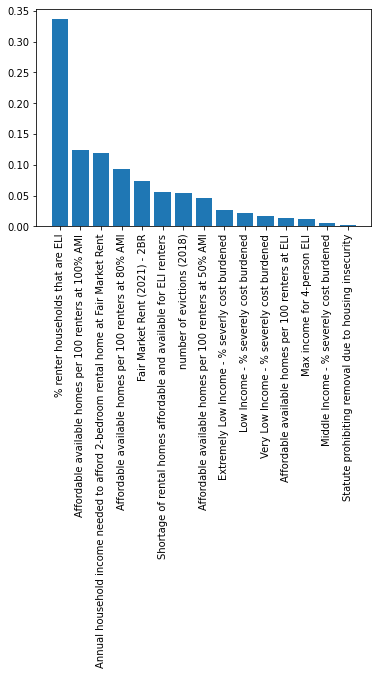

In [ ]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

# define dataset
X = model_data.drop(columns = 'ror_housing_state_2021')
y = model_data['ror_housing_state_2021']

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

# get importance and column names
importance = model.feature_importances_
features = X.columns

# sort feature importance in increasing order
sorted_idx = (-importance).argsort()
sorted_features = features[sorted_idx]
sorted_importance = importance[sorted_idx]

# summarize feature importance
for i,v in enumerate(sorted_importance):
    print('Feature: %s, Score: %.5f' % (sorted_features[i], v))

# plot feature importance
plt.bar(sorted_features, sorted_importance)
plt.xticks(rotation=90)
plt.show()


Feature: % renter households that are ELI, Score: 0.41225
Feature: Affordable available homes per 100 renters at 80% AMI, Score: 0.25201
Feature: number of evictions (2018), Score: 0.08310
Feature: Annual household income needed to afford 2-bedroom rental home at Fair Market Rent, Score: 0.06285
Feature: Fair Market Rent (2021) - 2BR, Score: 0.04621
Feature: Affordable available homes per 100 renters at 50% AMI, Score: 0.03741
Feature: Affordable available homes per 100 renters at 100% AMI, Score: 0.03262
Feature: Shortage of rental homes affordable and available for ELI renters, Score: 0.02796
Feature: Very Low Income - % severely cost burdened, Score: 0.01848
Feature: Max income for 4-person ELI, Score: 0.01705
Feature: Low Income - % severely cost burdened, Score: 0.00452
Feature: Extremely Low Income - % severly cost burdened, Score: 0.00235
Feature: Middle Income - % severely cost burdened, Score: 0.00168
Feature: Affordable available homes per 100 renters at ELI, Score: 0.00150
F

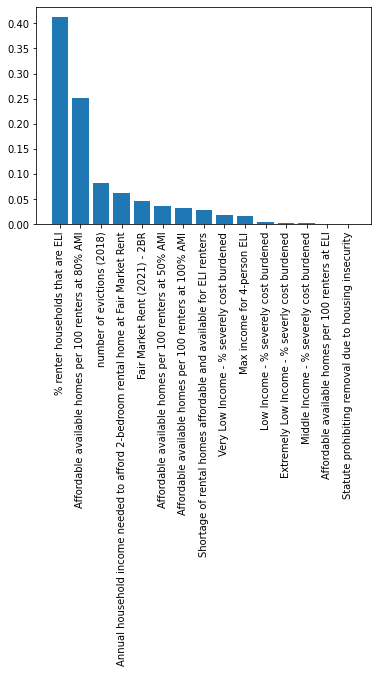

In [ ]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from matplotlib import pyplot as plt

# define dataset
X = model_data.drop(columns = 'ror_housing_state_2021')
y = model_data['ror_housing_state_2021']

# define the model
model = XGBRegressor()

# fit the model
model.fit(X, y)

# get importance and column names
importance = model.feature_importances_
features = X.columns

# sort feature importance in increasing order
sorted_idx = (-importance).argsort()
sorted_features = features[sorted_idx]
sorted_importance = importance[sorted_idx]

# summarize feature importance
for i,v in enumerate(sorted_importance):
    print('Feature: %s, Score: %.5f' % (sorted_features[i], v))

# plot feature importance
plt.bar(sorted_features, sorted_importance)
plt.xticks(rotation=90)
plt.show()


In [ ]:

from sklearn.model_selection import cross_val_score
# perform cross-validation with 5 folds
scores = cross_val_score(model, X, y, cv=5)

# print the mean and standard deviation of the accuracy scores
print(f"Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")


Accuracy: -7.289 (+/- 8.709)


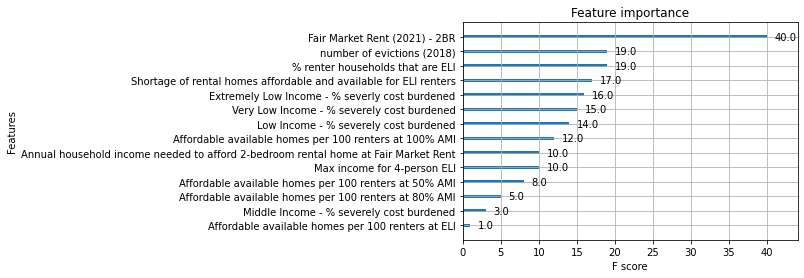

In [ ]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

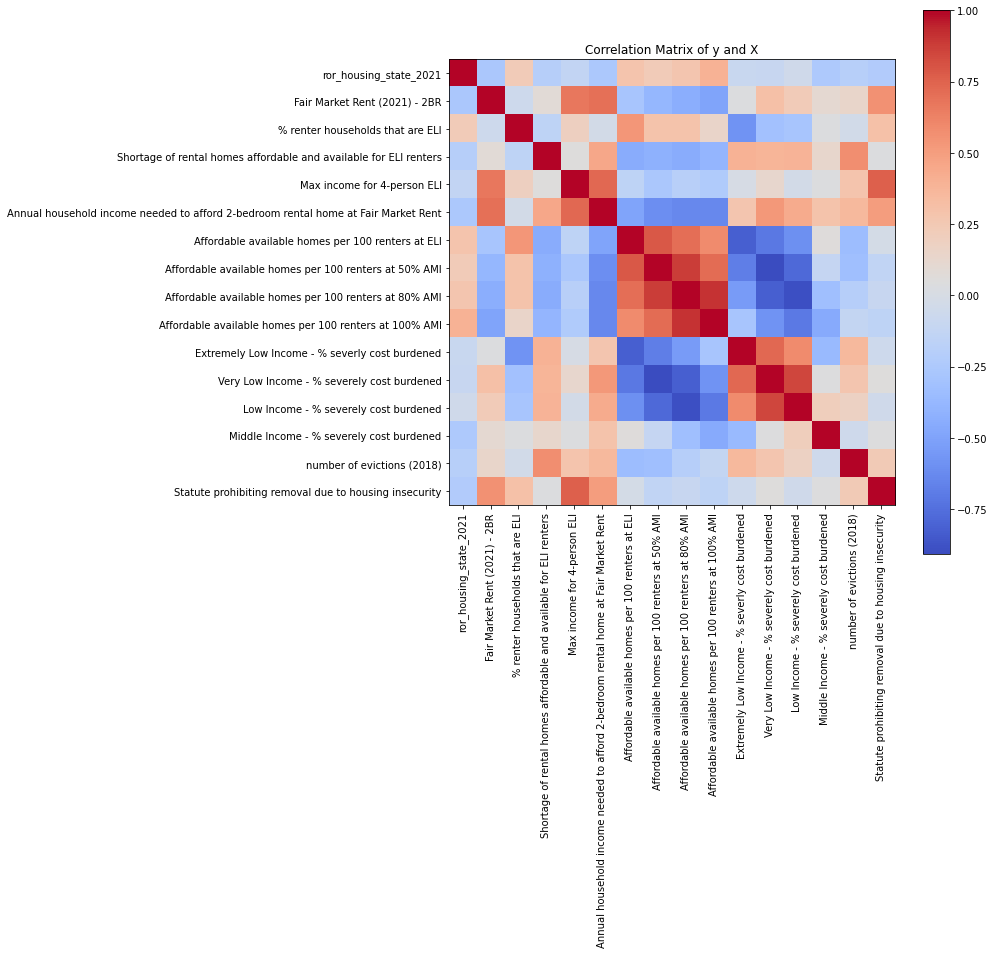

In [ ]:

# calculate correlation matrix between y and X
corr_matrix = pd.concat([y, X], axis=1).corr()

# plot correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
plt.title('Correlation Matrix of y and X')
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

In [ ]:
corr_matrix

,ror_housing_state_2021,Fair Market Rent (2021) - 2BR,% renter households that are ELI,Shortage of rental homes affordable and available for ELI renters,Max income for 4-person ELI,Annual household income needed to afford 2-bedroom rental home at Fair Market Rent,Affordable available homes per 100 renters at ELI,Affordable available homes per 100 renters at 50% AMI,Affordable available homes per 100 renters at 80% AMI,Affordable available homes per 100 renters at 100% AMI,Extremely Low Income - % severly cost burdened,Very Low Income - % severely cost burdened,Low Income - % severely cost burdened,Middle Income - % severely cost burdened,number of evictions (2018),Statute prohibiting removal due to housing insecurity
ror_housing_state_2021,1.000000,-0.260330,0.228881,-0.203199,-0.129372,-0.255847,0.278874,0.225603,0.275506,0.396197,-0.094398,-0.100416,-0.043812,-0.250703,-0.198103,-0.222115
Fair Market Rent (2021) - 2BR,-0.260330,1.000000,-0.063300,0.082582,0.668994,0.698279,-0.276127,-0.378797,-0.434564,-0.496550,0.037747,0.308569,0.232517,0.101371,0.135738,0.553485
% renter households that are ELI,0.228881,-0.063300,1.000000,-0.148204,0.189323,-0.026760,0.535745,0.288376,0.290386,0.149735,-0.579952,-0.309679,-0.280507,0.036560,-0.033580,0.302492
Shortage of rental homes affordable and available for ELI renters,-0.203199,0.082582,-0.148204,1.000000,0.048621,0.454516,-0.448537,-0.419548,-0.449872,-0.393333,0.394337,0.379186,0.383700,0.130259,0.572005,0.034504
Max income for 4-person ELI,-0.129372,0.668994,0.189323,0.048621,1.000000,0.728638,-0.150784,-0.263253,-0.185808,-0.233738,-0.001001,0.124815,-0.022785,0.035337,0.278850,0.759492
Annual household income needed to afford 2-bedroom rental home at Fair Market Rent,-0.255847,0.698279,-0.026760,0.454516,0.728638,1.000000,-0.495976,-0.606737,-0.636767,-0.637375,0.274869,0.530138,0.431279,0.291274,0.356088,0.507243
Affordable available homes per 100 renters at ELI,0.278874,-0.276127,0.535745,-0.448537,-0.150784,-0.495976,1.000000,0.784048,0.703997,0.589410,-0.819394,-0.713394,-0.600562,0.056773,-0.333751,-0.014397
Affordable available homes per 100 renters at 50% AMI,0.225603,-0.378797,0.288376,-0.419548,-0.263253,-0.606737,0.784048,1.000000,0.878444,0.715526,-0.677434,-0.907476,-0.778037,-0.113250,-0.321571,-0.137667
Affordable available homes per 100 renters at 80% AMI,0.275506,-0.434564,0.290386,-0.449872,-0.185808,-0.636767,0.703997,0.878444,1.000000,0.909808,-0.535538,-0.824099,-0.886555,-0.324252,-0.202151,-0.099792
Affordable available homes per 100 renters at 100% AMI,0.396197,-0.496550,0.149735,-0.393333,-0.233738,-0.637375,0.589410,0.715526,0.909808,1.000000,-0.280109,-0.583867,-0.702988,-0.456515,-0.121963,-0.147885


In [ ]:

# calculate correlation coefficients between y and all columns of X
corr_matrix = pd.concat([y, X], axis=1).corr()
corr_with_y = corr_matrix.iloc[:-1,-1]

# sort correlation coefficients in increasing order
sorted_corr_with_y = corr_with_y.sort_values()

# print correlation coefficients between y and all columns of X in increasing order
print(f'Correlation coefficients between y and all columns of X in increasing order:')
print(sorted_corr_with_y)

Correlation coefficients between y and all columns of X in increasing order:
ror_housing_state_2021                                                               -0.222115
Affordable available homes per 100 renters at 100% AMI                               -0.147885
Affordable available homes per 100 renters at 50% AMI                                -0.137667
Affordable available homes per 100 renters at 80% AMI                                -0.099792
Extremely Low Income - % severly cost burdened                                       -0.058118
Low Income - % severely cost burdened                                                -0.047839
Affordable available homes per 100 renters at ELI                                    -0.014397
Shortage of rental homes affordable and available for ELI renters                     0.034504
Middle Income - % severely cost burdened                                              0.043807
Very Low Income - % severely cost burdened                          

#Variable Importance

In [ ]:
data_2021_only_removed.shape

(157033, 109)

In [ ]:
race_columns =  ['AMIAKN',
 'ASIAN',
 'BLKAFRAM',
 'HAWAIIPI',
 'WHITE',
 'UNTODETM',
 'HISORGIN']

 child_columns  = 
 [ 'CLINDIS',
  'MR',
 'VISHEAR',
 'PHYDIS',
 'EmotDist',
 'OTHERMED',
  'EVERADPT',
  'TOTALREM',
  'NUMPLEP',
 'MANREM',
  'PreviousLOS',
  'White','CaseGoal']

removal_flags = ['NEGLECT','PHYABUSE','SEXABUSE','AAPARENT','DAPARENT','AACHILD','DACHILD','CHILDIS','CHBEHPRB','PRTSDIED',
               'PRTSJAIL','NOCOPE','HOUSING','ABANDMNT','RELINQSH']

foster = ['RF1AMAKN',
 'RF1ASIAN',
 'RF1BLKAA',
 'RF1NHOPI',
 'RF1WHITE',
 'RF1UTOD',
 'HOFCCTK1',
 'RF2AMAKN',
 'RF2ASIAN',
 'RF2BLKAA',
 'RF2NHOPI',
 'RF2WHITE',
 'RF2UTOD']


 parents = []

In [ ]:
data_2021_only_removed.columns.tolist()

['FY',
 'Version',
 'STATE',
 'St',
 'REPDATYR',
 'REPDATMO',
 'FIPSCode',
 'RecNumbr',
 'SEX',
 'AMIAKN',
 'ASIAN',
 'BLKAFRAM',
 'HAWAIIPI',
 'WHITE',
 'UNTODETM',
 'HISORGIN',
 'CLINDIS',
 'MR',
 'VISHEAR',
 'PHYDIS',
 'EmotDist',
 'OTHERMED',
 'EVERADPT',
 'AGEADOPT',
 'TOTALREM',
 'NUMPLEP',
 'MANREM',
 'PHYABUSE',
 'SEXABUSE',
 'NEGLECT',
 'AAPARENT',
 'DAPARENT',
 'AACHILD',
 'DACHILD',
 'CHILDIS',
 'CHBEHPRB',
 'PRTSDIED',
 'PRTSJAIL',
 'NOCOPE',
 'ABANDMNT',
 'RELINQSH',
 'HOUSING',
 'CURPLSET',
 'PLACEOUT',
 'CASEGOAL',
 'CTKFAMST',
 'CTK1YR',
 'CTK2YR',
 'FOSFAMST',
 'FCCTK1YR',
 'FCCTK2YR',
 'RF1AMAKN',
 'RF1ASIAN',
 'RF1BLKAA',
 'RF1NHOPI',
 'RF1WHITE',
 'RF1UTOD',
 'HOFCCTK1',
 'RF2AMAKN',
 'RF2ASIAN',
 'RF2BLKAA',
 'RF2NHOPI',
 'RF2WHITE',
 'RF2UTOD',
 'HOFCCTK2',
 'DISREASN',
 'IVEFC',
 'IVEAA',
 'IVAAFDC',
 'IVDCHSUP',
 'XIXMEDCD',
 'SSIOTHER',
 'NOA',
 'FCMntPay',
 'DOB',
 'PedRevDt',
 'Rem1Dt',
 'RemTrnDt',
 'DLstFCDt',
 'LatRemDt',
 'CurSetDt',
 'DoDFCDt',
 'DoDTrnD

In [ ]:
data_2021_only_removed_flags = data_2021_only_removed[removal_cols]

In [ ]:
remove_cols_mean = data_2021_only_removed[removal_cols].mean()
# all_cols_mean = data_2021_only_removed.mean()
remove_cols_mean

NEGLECT     0.628532
PHYABUSE    0.124957
SEXABUSE    0.041515
AAPARENT    0.058717
DAPARENT    0.360672
AACHILD     0.003383
DACHILD     0.022523
CHILDIS     0.018460
CHBEHPRB    0.075116
PRTSDIED    0.012844
PRTSJAIL    0.060713
NOCOPE      0.136234
HOUSING     0.095431
ABANDMNT    0.047934
RELINQSH    0.008806
dtype: float64

In [ ]:
remove_cols_housing_mean = data_2021_only_removed[data_2021_only_removed['HOUSING'] == 1][removal_cols].mean()
# all_cols_housing_mean = data_2021_only_removed[data_2021_only_removed['HOUSING'] == 1].mean()
remove_cols_housing_mean

NEGLECT     0.691351
PHYABUSE    0.081248
SEXABUSE    0.028181
AAPARENT    0.068133
DAPARENT    0.549771
AACHILD     0.004237
DACHILD     0.026096
CHILDIS     0.018362
CHBEHPRB    0.040153
PRTSDIED    0.008071
PRTSJAIL    0.091673
NOCOPE      0.178504
HOUSING     1.000000
ABANDMNT    0.065174
RELINQSH    0.004843
dtype: float64

In [ ]:
#60% more Removal Reason-Parent Death
#16% more Alcohol Abuse Parent
# 53% drug abuse parent
data_2021_only_removed[data_2021_only_removed['HOUSING'] == 1][removal_cols].mean()/data_2021_only_removed[removal_cols].mean()

NEGLECT      1.099945
PHYABUSE     0.650212
SEXABUSE     0.678818
AAPARENT     1.160360
DAPARENT     1.524297
AACHILD      1.252677
DACHILD      1.158664
CHILDIS      0.994679
CHBEHPRB     0.534548
PRTSDIED     0.628411
PRTSJAIL     1.509941
NOCOPE       1.310275
HOUSING     10.478746
ABANDMNT     1.359655
RELINQSH     0.549905
dtype: float64

In [ ]:
all_cols_mean/all_cols_housing_mean

In [ ]:
data_2021_only_removed_flags

In [ ]:
data_2021_only_removed.head()

,FY,Version,STATE,St,REPDATYR,REPDATMO,FIPSCode,RecNumbr,SEX,AMIAKN,ASIAN,BLKAFRAM,HAWAIIPI,WHITE,UNTODETM,HISORGIN,CLINDIS,MR,VISHEAR,PHYDIS,EmotDist,OTHERMED,EVERADPT,AGEADOPT,TOTALREM,NUMPLEP,MANREM,PHYABUSE,SEXABUSE,NEGLECT,AAPARENT,DAPARENT,AACHILD,DACHILD,CHILDIS,CHBEHPRB,PRTSDIED,PRTSJAIL,NOCOPE,ABANDMNT,RELINQSH,HOUSING,CURPLSET,PLACEOUT,CASEGOAL,CTKFAMST,CTK1YR,CTK2YR,FOSFAMST,FCCTK1YR,FCCTK2YR,RF1AMAKN,RF1ASIAN,RF1BLKAA,RF1NHOPI,RF1WHITE,RF1UTOD,HOFCCTK1,RF2AMAKN,RF2ASIAN,RF2BLKAA,RF2NHOPI,RF2WHITE,RF2UTOD,HOFCCTK2,DISREASN,IVEFC,IVEAA,IVAAFDC,IVDCHSUP,XIXMEDCD,SSIOTHER,NOA,FCMntPay,DOB,PedRevDt,Rem1Dt,RemTrnDt,DLstFCDt,LatRemDt,CurSetDt,DoDFCDt,DoDTrnDt,TPRMomDt,TPRDadDt,TPRDate,LatRemLOS,SettingLOS,PreviousLOS,LifeLOS,AgeAtStart,AgeAtLatRem,AgeAtEnd,InAtStart,InAtEnd,Entered,Exited,Served,IsWaiting,IsTPR,AgedOut,RaceEthn,Race,RU13,StFCID,PeriodStart,PeriodEnd,state_name,Year_removal
0,2021,1,1,AL,2022,3,8.0,000002184641,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2.0,1,1.0,1982.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2007-11-15,NaN,2021-10-01,2021-10-03,NaN,2021-10-01,2021-11-03,2021-12-17,2021-12-17,NaN,NaN,NaN,8.0,NaN,NaN,8.0,12,13,13,0,1,1,0,1,0,0,0,1,1,4.0,AL000002184641,2020-10-01,2021-09-30,Alabama,2021
1,2021,1,1,AL,2022,3,8.0,000009261202,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2.0,5,3.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2002-12-15,NaN,2012-01-22,2021-07-16,2013-07-29,2021-07-04,2022-02-26,2022-02-28,2022-03-06,NaN,NaN,NaN,92.0,NaN,554.0,646.0,17,18,18,0,1,1,0,1,0,0,0,1,1,3.0,AL000009261202,2020-10-01,2021-09-30,Alabama,2021
2,2021,1,1,AL,2022,3,8.0,000040342133,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,2.0,3,3.0,1988.0,NaN,3.0,1964.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,0.0,0.0,0.0,0.0,0.0,0.0,1.0,556.0,2011-12-15,2021-07-16,2021-04-30,2021-10-20,NaN,2021-04-30,2022-03-18,NaN,NaN,NaN,NaN,NaN,160.0,NaN,NaN,160.0,8,9,9,0,1,1,0,1,1,0,0,1,1,2.0,AL000040342133,2020-10-01,2021-09-30,Alabama,2021
3,2021,1,1,AL,2022,3,8.0,000041185533,2.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,2.0,1,3.0,1989.0,NaN,1.0,1984.0,1983.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,99,0.0,0.0,0.0,0.0,1.0,0.0,0.0,527.0,2021-09-15,2022-03-05,2021-09-19,2021-10-21,NaN,2021-09-19,2021-09-19,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,7.0,-1,0,0,0,1,1,0,1,0,0,0,6,6,3.0,AL000041185533,2020-10-01,2021-09-30,Alabama,2021
4,2021,1,1,AL,2022,3,1073.0,000043725533,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2.0,1,3.0,1984.0,NaN,3.0,1964.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,0.0,0.0,0.0,0.0,0.0,0.0,1.0,243.0,2017-03-15,2021-11-24,2021-09-12,2021-10-05,NaN,2021-09-12,2021-09-20,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,3,4,4,0,1,1,0,1,0,0,0,2,2,1.0,AL000043725533,2020-10-01,2021-09-30,Alabama,2021
